In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=30,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/30
34/34 [==============================] - 36s 1s/step - loss: 0.7254 - accuracy: 0.5184 - val_loss: 0.6889 - val_accuracy: 0.5038
Epoch 2/30
34/34 [==============================] - 34s 988ms/step - loss: 0.6511 - accuracy: 0.6183 - val_loss: 0.4995 - val_accuracy: 0.7782
Epoch 3/30
34/34 [==============================] - 34s 990ms/step - loss: 0.4827 - accuracy: 0.7776 - val_loss: 0.3877 - val_accuracy: 0.8647
Epoch 4/30
34/34 [==============================] - 34s 989ms/step - loss: 0.3491 - accuracy: 0.8549 - val_loss: 0.2528 - val_accuracy: 0.9098
Epoch 5/30
34/34 [==============================] - 34s 987ms/step - loss: 0.2499 - accuracy: 0.9133 - val_loss: 0.2372 - val_accuracy: 0.9211
Epoch 6/30
34/34 [==============================] - 34s 994ms/step - loss: 0.2149 - accuracy: 0.9237 - val_loss: 0.2805 - val_accuracy: 0.8872
Epoch 7/30
34/34 [==============================] - 33s 984ms/step - loss: 0.1510 - accuracy: 0.9463 - val_loss: 0.1934 - val_accuracy: 0.9361
Ep

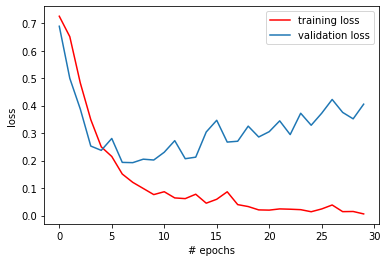

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

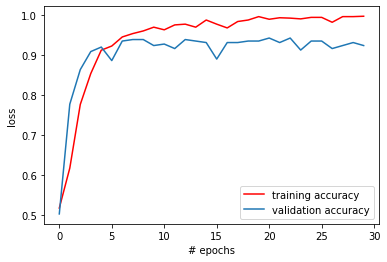

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 211ms/step - loss: 0.3321 - accuracy: 0.9324
[0.33212512731552124, 0.9324324131011963]
